# General Instructions to students:

1. There are 4 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages, unless needed.

4. The code is to be written in Python 3.x syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/printed.

6. If TextWrite cells ask you to give accuracy/error/other numbers, you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook will get zero marks.

8. All code must be written by you. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

10. All plots must be labelled properly, the labels/legends should be readable, all tables must have rows and columns named properly.

11. Change the name of file with your roll no. For example cs15d203.ipynb (for notebook) and cs15d203.py (for plain python script)





In [ ]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

Problem 4: Life in Lower Dimensions

You are provided with a [dataset](https://drive.google.com/file/d/1wOp8K9BS8Ncmjz7aP8RdqukqkGNSwK4i/view?usp=drive_link) of 1797 images - each image is 8x8 pixels and provided as a feature vector of length 64. You will try your hands at transforming this dataset to a lower-dimensional space using PCA clustering the images in this reduced space.

Run the PCA algorithm on the given dataset. Plot the cumulative percentage variance explained by the principal components. Report the number of principal components that contribute to 90% of the variance in the dataset.

In [ ]:
# Cell type : CodeWrite
# write the function for PCA clustering here.

import pandas as pd
from numpy.linalg import eig

def calcCovSame(array):
  similarity = 0
  length = len(array)
  mean = array.sum()/length
  for i in array:
    similarity = similarity + pow(i[0] - mean,2)
  similarity = similarity / (array.size)
  return similarity


def calcCovDiff(array1,array2):
  similarity = 0
  length = len(array1)
  mean1 = array1.sum()/length
  mean2 = array2.sum()/length
  for i in range(0,array2.size):
    similarity = similarity + (array1[i][0] - mean1)*(array2[i][0] - mean2)
  similarity = similarity / (array1.size)
  return similarity

def PCA(Data):
  dataset = pd.DataFrame(np.array(Data))
  covar1 = np.zeros((64,64))
  length = len(dataset)
  for index in range(0,covar1.shape[0]):
    for index1 in range(0,covar1.shape[0]):
      covar1[index][index1] = calcCovDiff(dataset[[index]].to_numpy(),dataset[[index1]].to_numpy())

  w,v=eig(covar1)
  cumm_eigens = list()
  curr = 0
  sum = np.sum(w)
  for i in w:
    curr = curr + i
  cumm_eigens.append(curr/sum)
  total_egnvalues = np.sum(w)
  var_exp = [(i/total_egnvalues) for i in sorted(w, reverse=True)]
  cum_sum_exp = np.cumsum(var_exp)
  plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual variance by each PC')
  plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative variance')
  plt.ylabel('variance ratio')
  plt.xlabel('Principal component indicies')
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()
  numPCs = 0
  for i in cum_sum_exp:
    numPCs = numPCs + 1
    if( i > 0.90):
      break
  return numPCs



4b)  Perform reconstruction of data using the dimensionality-reduced data considering the number of dimensions [2,4,8,16]. Report the Mean Square Error (MSE) between the original data and reconstructed data, and interpret the optimal dimensions $\hat{d}$ based on the MSE values.

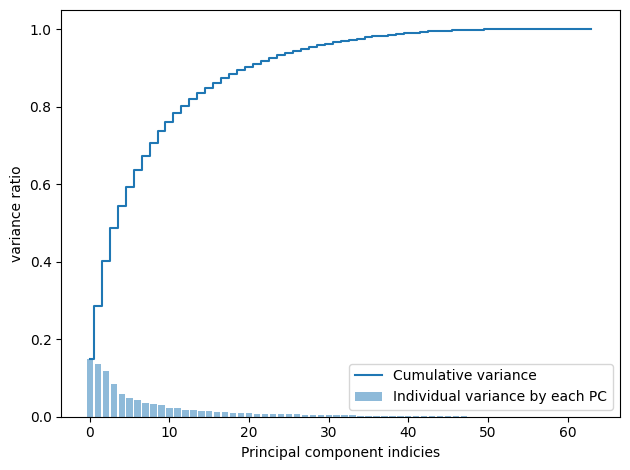

21

In [ ]:
PCA(Data)

In [ ]:
# Cell type : CodeWrite
# Write the code for data reconstruction, run the algorithm for dimensions.
dataset = Data
pcList = [2,4,8,16]
Imagedata = pd.DataFrame(np.array(dataset))
centeredData = Imagedata - Imagedata.mean()
covar = np.zeros((64,64))
length = len(centeredData)
for index in range(0,covar.shape[0]):
  for index1 in range(0,covar.shape[0]):
    covar[index][index1] = calcCovDiff(centeredData[[index]].to_numpy(),centeredData[[index1]].to_numpy())
vals, vecs = np.linalg.eig(covar)
list1, list2 = zip(*sorted(zip(vals.tolist(), vecs.tolist())))
errors = list()
for components in pcList:
  pc1 = np.array(vecs[:,0:components])
  proj = np.dot(centeredData.to_numpy(), pc1)
  newP = np.matmul(proj,pc1.transpose())
  newP = newP+Imagedata.mean().to_numpy().reshape(1,64)
  errors.append(pd.DataFrame((newP-np.array(dataset))**2).sum().sum()/len(dataset))
print(errors)
optimalPcIndex = errors.index(min(errors))
print(pcList[optimalPcIndex])

[858.9447808487328, 616.1911300562695, 391.7947361149765, 180.9397032573787]
16
